importing Jupyter notebook from gaemain.ipynb
importing Jupyter notebook from ram_mediapipe.ipynb
edges_mediapipe= 2556 1278.0
train= (1322, 2) test= (132, 2)
Optimization Finished!


C:\Users\RAAVAN RAY\AppData\Local\Temp\ipykernel_13792\3696844491.py:23: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


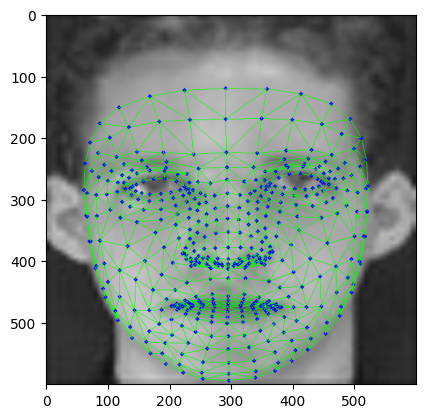

In [1]:
from __future__ import division
from __future__ import print_function

import argparse
import time

import numpy as np
import scipy.sparse as sp
import torch
import torchvision
from torch import optim
import pandas as pd


from gae.model import GCNModelVAE

from gae.optimizer import loss_function
from gae.utils import load_data, mask_test_edges, preprocess_graph, get_roc_score

import import_ipynb
from gaemain import gae_for

from scipy.stats.stats import pearsonr  


edges_mediapipe= 2556 1278.0
train= (1322, 2) test= (132, 2)
Optimization Finished!


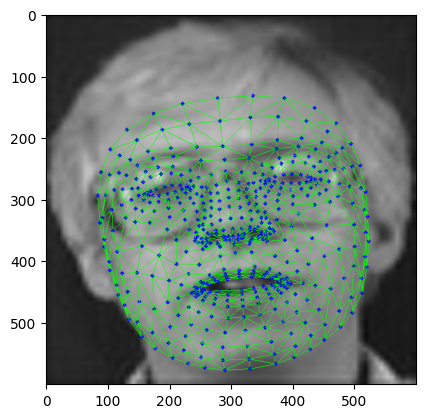

In [2]:
image_path="./orl_dataset/person2/test_image/11_2.jpg"
Z=gae_for(image_path)

In [3]:
print(type(Z))
Z=Z.detach().numpy()
print(Z.shape)

<class 'torch.Tensor'>
(468, 16)


In [4]:

path="./orl_dataset/person2/latent_representation/testfile1"
Z1 = np.loadtxt(path, delimiter=',')
# Z1=torch.from_numpy(array)
Z1=Z1[1:]
# print(Z1[0])


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
def get_cosine_similarity(feature_vec_1, feature_vec_2):    
    return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]
print(get_cosine_similarity(Z,Z1))    

-0.016543759029864477


In [6]:
dist=[]
c_dist=[]
for i in range(468):
    dist.append(np.linalg.norm(Z[i]- Z1[i]))
    c_dist.append(pearsonr(np.array(Z[i]).flatten() ,np.array(Z1[i]).flatten())[0])
# print(dist)
min_ind=dist.index(min(dist))
max_ind=c_dist.index(max(c_dist))
print(min_ind,max_ind)

34 327
